# Aim

Identify FAST's steady-state error (SSE) from images. Mostly just to figure out the image processing side of things; I expect the SSE to be negligible compared to read/photon noise anyway.

In [5]:
using NPZ, Plots
bestflat = npzread("../data/bench/bestflats/01_07_2021_12.npy")

32×32 Matrix{Float32}:
 0.595882  0.594531  0.59318   0.59183   …  0.556723  0.522892  0.303572
 0.618528  0.617177  0.615827  0.614477     0.579369  0.578019  0.483381
 0.641175  0.639824  0.638474  0.637123     0.602016  0.600665  0.473984
 0.650749  0.648986  0.596353  0.608108     0.551835  0.623312  0.46002
 0.658542  0.630919  0.590847  0.592067     0.531444  0.613613  0.434788
 0.666336  0.614052  0.59167   0.598032  …  0.502808  0.597739  0.416238
 0.672061  0.554427  0.554807  0.562218     0.451375  0.551785  0.398395
 0.640245  0.518669  0.530707  0.538769     0.398243  0.497975  0.372629
 0.629434  0.492382  0.484757  0.491052     0.408238  0.501301  0.372317
 0.602708  0.450048  0.445669  0.563098     0.389367  0.47211   0.340494
 0.592823  0.426607  0.418541  0.577482  …  0.349951  0.446136  0.332585
 0.568434  0.377469  0.473551  0.522024     0.31339   0.42076   0.315231
 0.546421  0.35512   0.46928   0.469353     0.297565  0.408047  0.303548
 ⋮                           

In [27]:
using LinearAlgebra

In [72]:
function cm(z::Matrix)
    r, c = size(z)
    x, y = (1:r), (1:c)
    n = sum(z)
    return (sum(z, dims=1) ⋅ x)/n, (sum(z, dims=2) ⋅ y)/n
end

cm (generic function with 1 method)

In [101]:
im = npzread("../data/bench/unitsteps/unitstep_amp_0.102_ang_6.283_dt_01_07_2021_17.npy");

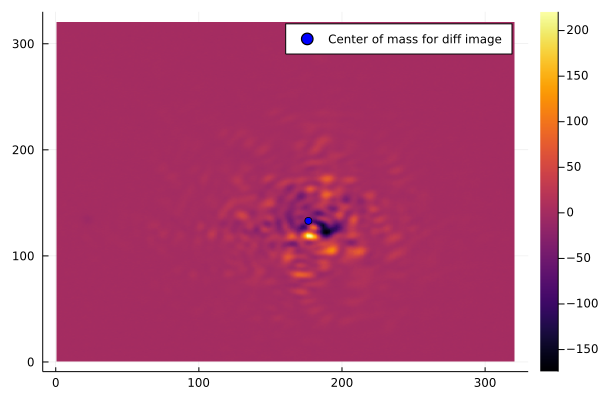

In [103]:
p = plot()
heatmap!(im)
scatter!(cm(im), color="blue", label="Center of mass for diff image")

In [134]:
files = readdir("../data/bench/unitsteps")
amps = zeros(size(files))
angs = zeros(size(files))
cm_x = zeros(size(files))
cm_y = zeros(size(files))
for (i, f) in enumerate(files)
    s = maximum(findfirst("amp_", f))
    m = minimum(findfirst("_ang_", f))
    q = maximum(findfirst("_ang_", f))
    e = minimum(findfirst("_dt", f))
    amp = parse(Float64, f[s+1:m-1])
    ang = parse(Float64, f[q+1:e-1])
    amps[i], angs[i] = amp, ang
    im = npzread("../data/bench/unitsteps/" * f);
    cm_x[i], cm_y[i] = cm(im)
end

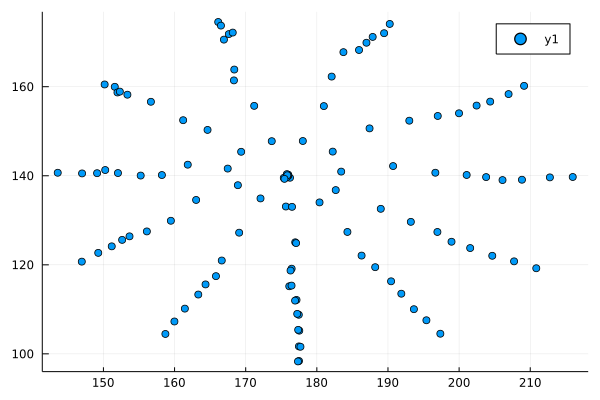

In [144]:
scatter(cm_x, cm_y)